In [ ]:
https://kroki.io/mermaid/svg/eNp9U8Fu2zAMvfcreBrcQ39hQJp2Q7FkDZqhOwhBoMiMo02WDIlukn39KMk2Wi2ZDxJFvWc-UmTjZXeAxcsN8Oedo2ohbfM1edckCW-nG7i7-wzKeazmvMDcWYUdFfe1JFk98BLvCW1530qru95I0s5Wy3eHAieVwhCqWdrgE6yV60otO7S41xSq-8G4vUmAqDGL5fheGjHPO0y6pLboNwU46j2RyLk_nlD1UVfO40QFukMfdIgJitVkwkx5x3LXhF3YZDGxIInx-018w_PdqzQ9wkpqHzYfAd2ZDs6KmT3DKpnwvPuFigpYywWRDQaxHAyILzY_cE4F8k16LXeGoa-jVSBqp_qWhQfxMFpX_0bOma3rqesZ_oMP8JwPBU71gVwr5mnLJV-T7xX1HseivO-CRPIoa_HCC3x3Nac0vHvqwM1lytFrQvEzrgNp6Wq9P_-XpK0mLY3-g-JpNPPtcBzZiZ6bMBFtjCCyLM2V5HLAzJghsraQ2mZT0tooSWMtloMBu3Pm_APtZAgMfGo7o5Umw12QPHCPdES0V2hNjLsNcTxqkaakjtqKLh4SGicmMcOBu8I2Ij9RPlwK9oHEFeWei50iUqVgOTkuoIeZ2sZpEcMgwTQvCi9SuAB42hrXaCUebWxbnsHkhEV0whfjjleCeTdNO79xnYaXfeD2_MB751uZq_EXsGal7w

In [1]:
import time
from typing import TypedDict, List
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

class ChatState(TypedDict):
    """State schema for our chatbot"""
    user_input: str
    history: List[str]

graph = StateGraph(ChatState)

prompt = ChatPromptTemplate.from_template(
   "You are a helpful assistant. Respond to the user based on the conversation."
    "Here is the conversation so far: {history}. User message: {user_input}",
)

model = ChatOpenAI(temperature=0.5)
output_parser = StrOutputParser()

chain = prompt | model | output_parser

def add_user_message(state: ChatState):
    print(f"""📥 Adding user message: {state["user_input"]}""")
    new_history = state['history'] + [f"""User: {state["user_input"]}"""]
    return {"history": new_history}

def generate_bot_response(state: ChatState):
    last_message = state['history'][-1]
    user_input = last_message.replace("User: ", "")
    
    response = chain.invoke({"user_input": user_input, "history": state['history']})
    new_history = state['history'] + [f"Bot: {response}"]
    return {"history": new_history}


graph.add_node("add_user", add_user_message)
graph.add_node("generate_bot", generate_bot_response)

graph.set_entry_point("add_user")
graph.add_edge("add_user", "generate_bot")
graph.add_edge("generate_bot", END)

app = graph.compile()

state = ChatState(history=[])


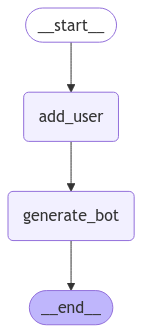

In [2]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [3]:
print("💬 Start chatting (type 'exit' to quit)")
while True:
    user_input = input("\nYou: ")
    if user_input.lower() == 'exit':
        break
    state["user_input"] = user_input
    state = app.invoke(state)
    
    print(f"\n{state['history'][-1]}")
    time.sleep(.5)

💬 Start chatting (type 'exit' to quit)
📥 Adding user message: Boa noite LLM

Bot: Boa noite! Como posso ajudar você hoje?
📥 Adding user message: QUal a sua cor favorita

Bot: Desculpe, como assistente de IA, não tenho uma cor favorita. Posso te ajudar com mais alguma coisa?
📥 Adding user message: Me diga quais são as 3 cores mais legais

Bot: Desculpe, como assistente de IA, não tenho preferências pessoais. Posso te ajudar com informações sobre cores populares ou tendências atuais, se desejar. Como posso te ajudar mais?
📥 Adding user message: Por que o sol é quente

Bot: O sol é quente devido à sua composição de gases e à reação nuclear que ocorre em seu núcleo, que gera uma quantidade imensa de calor e luz. Esse calor e luz são emitidos para o espaço, aquecendo os planetas próximos, incluindo a Terra. Posso te ajudar com mais alguma dúvida?


In [4]:
print(state)

{'user_input': 'Entendi, valeu!', 'history': ['User: Olá', 'Bot: Olá! Como posso ajudar você hoje?', 'User: Me conte uma piada', 'Bot: Por que o livro de matemática ficou de castigo?\n\nPorque ele estava cheio de problemas! 😄', 'User: Pode me explicar a piada?', 'Bot: Claro! A piada faz um trocadilho com a palavra "problemas", que pode significar tanto questões matemáticas quanto situações complicadas. Nesse caso, o livro de matemática ficou de castigo porque estava cheio de problemas, ou seja, cheio de questões matemáticas para resolver. Espero que tenha entendido e que tenha te arrancado um sorriso! 😄', 'User: Entendi, valeu!', 'Bot: Fico feliz em saber que você entendeu a piada! Se precisar de mais alguma coisa, estou aqui para ajudar. 😄']}


In [ ]:
print("\n📜 Conversation History:")
for message in state['history']:
    print(f"- {message}")


📜 Conversation History:
- User: Olá
- Bot: Olá! Como posso ajudar você hoje?
- User: Me conte uma piada
- Bot: Por que o livro de matemática ficou de castigo?

Porque ele estava cheio de problemas! 😄
- User: Pode me explicar a piada?
- Bot: Claro! A piada faz um trocadilho com a palavra "problemas", que pode significar tanto questões matemáticas quanto situações complicadas. Nesse caso, o livro de matemática ficou de castigo porque estava cheio de problemas, ou seja, cheio de questões matemáticas para resolver. Espero que tenha entendido e que tenha te arrancado um sorriso! 😄
- User: Entendi, valeu!
- Bot: Fico feliz em saber que você entendeu a piada! Se precisar de mais alguma coisa, estou aqui para ajudar. 😄
